# Cognifyz Technologies Intern Project
© Emmanuel Arkoh-Nelson

## Importing the neccessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import chardet
import pickle

Path to the csv `datasets`

In [2]:
PATH = "../data/raw/"

Read the csv `datasets` into pandas DataFrame

In [3]:
# Reading a small portion of the file to detect its encoding
with open(f"{PATH}Dataset.csv", 'rb') as f:
    result = chardet.detect(f.read())


print(result['encoding'])

UTF-8-SIG


In [4]:
datasets = pd.read_csv(f"{PATH}Dataset.csv", encoding=result['encoding'])

Exploring the first 3 rows of the `datasets`

In [5]:
datasets.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


## Cleaning and Refining our dataset for further EDA and subsequent modelling

### Trying to handle some encoding issues manually

In [6]:
# Define the mapping dictionary with corrected and encoded city names
city_mapping = {
    'S��o Paulo': 'São Paulo',
    'Bras�_lia': 'Brasília',
    '��stanbul': 'Istanbul',
}

# Replace the incorrectly encoded city names with the correct ones
datasets['City'] = datasets['City'].replace(city_mapping)

In [7]:
def replace_special_characters(df, column_name):
    """Replace special characters in a DataFrame column with their correct counterparts"""
    # Define a dictionary to map special characters to their correct counterparts
    special_characters = {
        "��": "é",
        "�": "ó",
        "_": " ",
        "#": " ",
        "-": " ",
        "۱": ""
    }

    df[column_name] = df[column_name].astype(str)
    
    # Replace special characters in the column
    df[column_name] = df[column_name].apply(lambda x: ''.join(special_characters.get(c, c) for c in x)).str.strip()
    
    return df

### Fixing wrong encoded issues in the Restaurant, Address, Locality and Locality Verbose Columns

In [8]:
# Fixing Restaurant Name issues
replace_special_characters(datasets, "Restaurant Name")

# Fixing Address Column issues as well
replace_special_characters(datasets, "Address")

# fixing the locality and locality verbose columns issues
replace_special_characters(datasets, "Locality")
replace_special_characters(datasets, "Locality Verbose")

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat Edsa Shangri La,162,Mandaluyong City,"Edsa Shangri La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri La, Ortigas, Mandaluyong City","Edsa Shangri La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,Istanbul,"Kemankeóó Karamustafa Paóóa Mahallesi, Rhtm Ca...",Karakó y,"Karakó y, óóstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aóóac,208,Istanbul,"Koóóuyolu Mahallesi, Muhittin óóstó ndaóó Cadd...",Koóóuyolu,"Koóóuyolu, óóstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,Istanbul,"Kuruó eóóme Mahallesi, Muallim Naci Caddesi, N...",Kuruó eóóme,"Kuruó eóóme, óóstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aóóók Kahve,208,Istanbul,"Kuruó eóóme Mahallesi, Muallim Naci Caddesi, N...",Kuruó eóóme,"Kuruó eóóme, óóstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


### Thiking of removing whitespaces in the column names

In [9]:
datasets.columns = datasets.columns.str.replace(" ", "").str.strip()

## Saving preprocessed dataset to pickle

In [14]:
# Ensure the directory exists or create it if not
os.makedirs("../data/interim/", exist_ok=True)

# Define the file path
file_path = "../data/interim/Datasets.pickle"

# Save the DataFrame to pickle file
with open(file_path, 'wb') as f:
    pickle.dump(datasets, f)

### And also saving it csv

In [15]:
os.makedirs("../data/processed/", exist_ok=True)
p_file_path = "../data/processed/Dataset.csv"

with open(p_file_path, "w", encoding="utf-8") as fp:
    datasets.to_csv(fp, index=False)

### Saving the processed dataset ready for modelling

In [158]:
os.makedirs("../data/processed/", exist_ok=True)
p_file_path = "../data/processed/Processed.csv"

with open(p_file_path, "w", encoding="utf-8") as pf:
    encoded_dataset.to_csv(pf, index=False)

## Level 1 Tasks
## Task 1

## Explore the dataset and identify the number of rows and columns.
- Task 1.a

Inspecting the total entries in the `datasets` dataframe

In [10]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RestaurantID       9551 non-null   int64  
 1   RestaurantName     9551 non-null   object 
 2   CountryCode        9551 non-null   int64  
 3   City               9551 non-null   object 
 4   Address            9551 non-null   object 
 5   Locality           9551 non-null   object 
 6   LocalityVerbose    9551 non-null   object 
 7   Longitude          9551 non-null   float64
 8   Latitude           9551 non-null   float64
 9   Cuisines           9542 non-null   object 
 10  AverageCostfortwo  9551 non-null   int64  
 11  Currency           9551 non-null   object 
 12  HasTablebooking    9551 non-null   object 
 13  HasOnlinedelivery  9551 non-null   object 
 14  Isdeliveringnow    9551 non-null   object 
 15  Switchtoordermenu  9551 non-null   object 
 16  Pricerange         9551 

In [11]:
print(f"There are {datasets.shape[0]} rows and {datasets.shape[1]} columns in the dataset.")

There are 9551 rows and 21 columns in the dataset.


In [12]:
datasets.isnull().sum()

RestaurantID         0
RestaurantName       0
CountryCode          0
City                 0
Address              0
Locality             0
LocalityVerbose      0
Longitude            0
Latitude             0
Cuisines             9
AverageCostfortwo    0
Currency             0
HasTablebooking      0
HasOnlinedelivery    0
Isdeliveringnow      0
Switchtoordermenu    0
Pricerange           0
Aggregaterating      0
Ratingcolor          0
Ratingtext           0
Votes                0
dtype: int64

## Check for missing values in each column and handle them accordingly.
- Task 1.b

_All the columns do not have missing values except for the `Cuisines` column. Let us handle this by replacing the missing values with the most occuring cuisine in the `Cuisines` column._

In [13]:
missing_values_per_column = datasets.isnull().sum()
columns_with_missing_values = missing_values_per_column[missing_values_per_column > 0]
print(f"There are {columns_with_missing_values.iloc[0]} missing values in the Cuisines column")

# We noticed from the datasets.info that the Cuisines column is categorical column
# Denoted by the 'object' dtype
# Hence we will use mode imputation to replace the missing values
# I didn't want to hard code this by just selecting the Cuisines column and imputing the mode
# like this datasets[Cuisines].fillna(datasets[Cuisines].mode()[0], inplace=True)
categorical_columns = datasets.select_dtypes(include=['object']).columns
for col in categorical_columns:
    datasets.fillna({col: datasets[col].mode()[0]}, inplace=True)


missing_values_after_imputation = datasets.isnull().sum()
print("\nMissing values after handling it:")
print(missing_values_after_imputation)

There are 9 missing values in the Cuisines column

Missing values after handling it:
RestaurantID         0
RestaurantName       0
CountryCode          0
City                 0
Address              0
Locality             0
LocalityVerbose      0
Longitude            0
Latitude             0
Cuisines             0
AverageCostfortwo    0
Currency             0
HasTablebooking      0
HasOnlinedelivery    0
Isdeliveringnow      0
Switchtoordermenu    0
Pricerange           0
Aggregaterating      0
Ratingcolor          0
Ratingtext           0
Votes                0
dtype: int64


Now that the missing values in the `Cuisines` column has been handled gracefully we can move on to the next task 

## Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.
- Task 1.c

For this task let us create a function that will check each column type.
And if a the dtype is 'object' it will convert itwill be converted to a 'category' dtype.

In [17]:
def convert_column_data_types(df, categorical_cols=None, numerical_cols=None):
    """Convert data types of columns in the dataframe to appropriate types."""
    if categorical_cols:
        df[categorical_cols] = df[categorical_cols].astype('category')
    if numerical_cols:
        df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')
    return df


cat_columns = ["RestaurantName", "City", "Address", "Locality", "LocalityVerbose",
               "Cuisines", "Currency", "HasTablebooking", "HasOnlinedelivery",
               "Isdeliveringnow", "Switchtoordermenu", "Ratingcolor", "Ratingtext"]

convert_column_data_types(datasets,categorical_cols=cat_columns)
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   RestaurantID       9551 non-null   int64   
 1   RestaurantName     9551 non-null   category
 2   CountryCode        9551 non-null   int64   
 3   City               9551 non-null   category
 4   Address            9551 non-null   category
 5   Locality           9551 non-null   category
 6   LocalityVerbose    9551 non-null   category
 7   Longitude          9551 non-null   float64 
 8   Latitude           9551 non-null   float64 
 9   Cuisines           9551 non-null   category
 10  AverageCostfortwo  9551 non-null   int64   
 11  Currency           9551 non-null   category
 12  HasTablebooking    9551 non-null   category
 13  HasOnlinedelivery  9551 non-null   category
 14  Isdeliveringnow    9551 non-null   category
 15  Switchtoordermenu  9551 non-null   category
 16  Pricer

Now that each 'object' dtype column has been converted to 'category' dtype column. We create another function that takes:
- a dataframe and
- a target variable
as arguments and plots the distribution of the target variable `(Aggregate rating)` to identify class imbalances

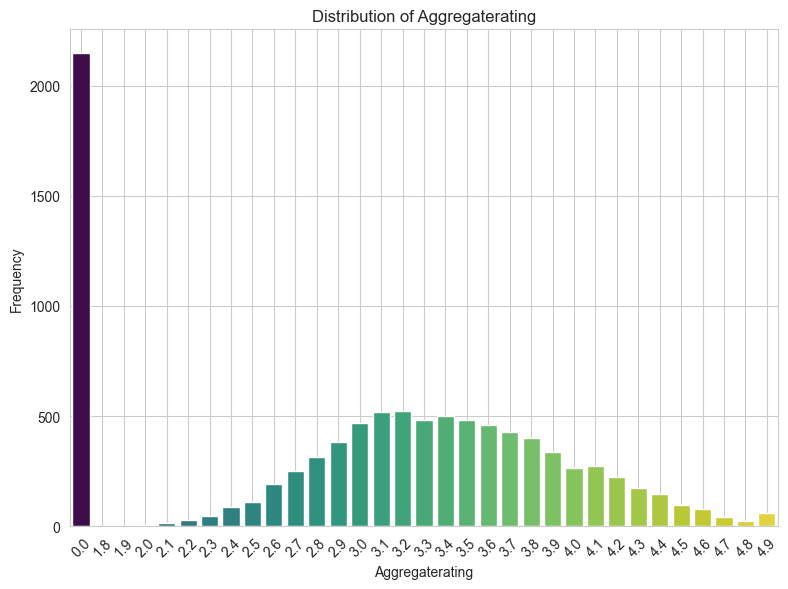

{'summary_statistics': {'mean': 2.66637001361114,
  'median': 3.2,
  'std_dev': 1.5163775396521328},
 'class_counts': {0.0: 2148,
  3.2: 522,
  3.1: 519,
  3.4: 498,
  3.3: 483,
  3.5: 480,
  3.0: 468,
  3.6: 458,
  3.7: 427,
  3.8: 400,
  2.9: 381,
  3.9: 335,
  2.8: 315,
  4.1: 274,
  4.0: 266,
  2.7: 250,
  4.2: 221,
  2.6: 191,
  4.3: 174,
  4.4: 144,
  2.5: 110,
  4.5: 95,
  2.4: 87,
  4.6: 78,
  4.9: 61,
  2.3: 47,
  4.7: 42,
  2.2: 27,
  4.8: 25,
  2.1: 15,
  2.0: 7,
  1.9: 2,
  1.8: 1}}

In [18]:
def plot_target_variable(df, target_column):
    """Analyze the distribution of the target variable and identify class imbalances."""
    # Set plot style
    sns.set_style('whitegrid')

    # Plot the distribution of the target variable using a countplot
    plt.figure(figsize=(8, 6))
    sns.countplot(x=target_column, hue=target_column, data=df, palette='viridis', legend=False)
    plt.title(f'Distribution of {target_column}', fontsize=12)
    plt.xlabel(target_column, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate summary statistics
    summary_statistics = {
        'mean': df[target_column].mean(),
        'median': df[target_column].median(),
        'std_dev': df[target_column].std()
    }

    # Check for class imbalances
    class_counts = df[target_column].value_counts().to_dict()

    return {'summary_statistics': summary_statistics, 'class_counts': class_counts}

plot_target_variable(datasets, "Aggregaterating")

`Class 0` Aggregate rating appears to be the majority class with 2148 counts and the next class is `Class 3.2` with 522 counts.
There seems to be a great imbalance in our target variable which we need to deal with later else our predictions might be biased
towards the majority class.

## Descriptive Analysis. 

## Task 2
- Task 2.a 
Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [19]:
datasets.describe(exclude=["category"])

,RestaurantID,CountryCode,Longitude,Latitude,AverageCostfortwo,Pricerange,Aggregaterating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


The numerical columns of the dataset provide key insights into various aspects of the restaurants. The "Average Cost for Two" exhibits considerable variability, ranging from 0 to 800,000 units, with a mean cost of approximately 1,199.21 units and a significant standard deviation of approximately 16,121.18, indicating a wide range of pricing across establishments. In terms of "Price Range," most restaurants fall within the lower price brackets, with a mean price range of approximately 1.80, suggesting that the majority of establishments offer affordable dining options. The "Aggregate Rating" column reflects the overall quality perception of restaurants, with ratings ranging from 0 to 4.9 and a mean rating of approximately 2.67, indicating a tendency towards lower ratings. Lastly, the "Votes" column, with a mean of approximately 156.91 and a significant standard deviation of approximately 430.17, highlights varying levels of engagement or popularity among restaurants, with some garnering substantial feedback while others receive fewer votes.

## Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines."
- Task 2.b

We will first look at the `Country Code` column. And since we have fuction that analyzed the distribution of the target variable for us.
We can rely on same function to achieve what we are looking at.

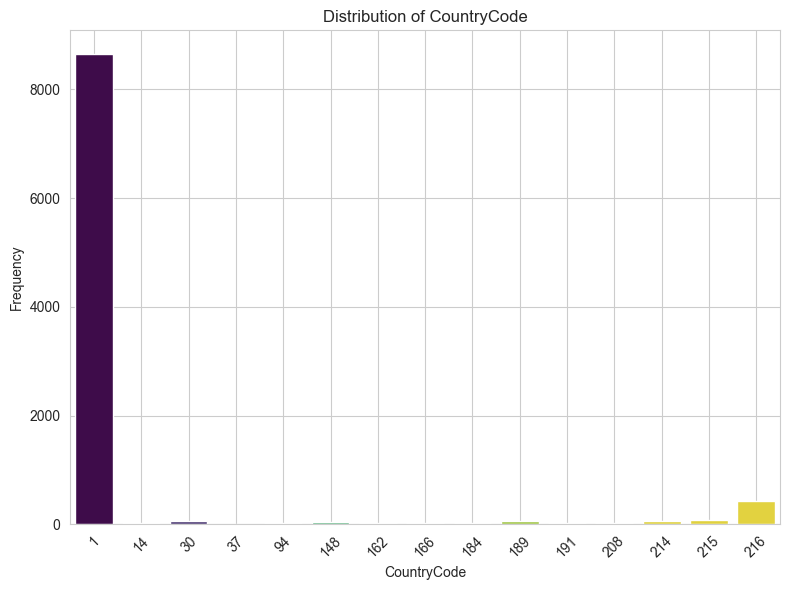

{'summary_statistics': {'mean': 18.365616165846507,
  'median': 1.0,
  'std_dev': 56.75054560094657},
 'class_counts': {1: 8652,
  216: 434,
  215: 80,
  30: 60,
  214: 60,
  189: 60,
  148: 40,
  208: 34,
  14: 24,
  162: 22,
  94: 21,
  184: 20,
  166: 20,
  191: 20,
  37: 4}}

In [20]:
plot_target_variable(datasets, "CountryCode")

The distribution of country codes in the dataset showcases a significant class imbalance, with the majority of observations attributed to country code 1, while other codes exhibit considerably fewer occurrences. This disparity suggests potential biases in the data collection process or variations in the availability of restaurant information across different regions.

We will now move to the `City` column in our dataset.

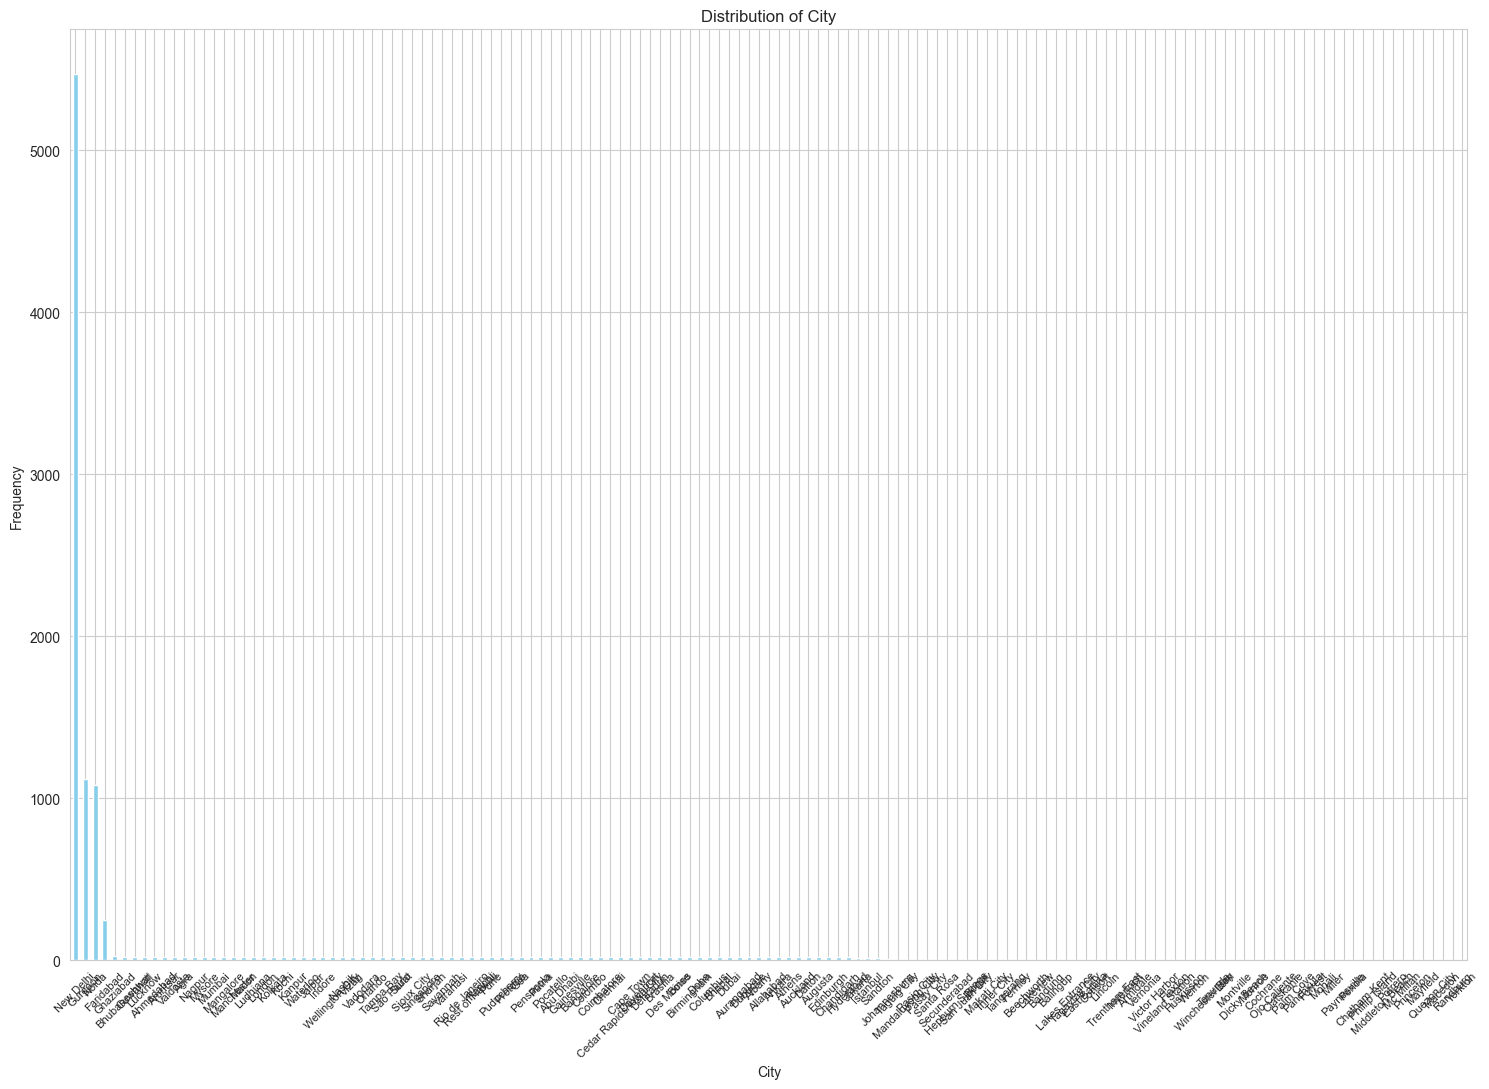

In [21]:
def plot_cat_column(df, column_name):
    """Plot the distribution of a categorical column using a bar plot."""
    # Set plot style
    sns.set_style('whitegrid')
    
    # Get value counts for the specified column
    value_counts = df[column_name].value_counts()
    
    # Plot the distribution using a bar plot
    plt.figure(figsize=(15, 11))
    value_counts.plot(kind='bar', color='skyblue')
    
    # Set plot title and labels
    plt.title(f'Distribution of {column_name}', fontsize=12)
    plt.xlabel(column_name, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_cat_column(datasets, "City")

The distribution of cities in the dataset shows that `New Delhi` is the most frequent city, appearing 5473 times. This is followed by `Gurgaon` with 1118 occurrences and `Noida` with 1080 occurrences. There is a wide variety of cities represented in the dataset, ranging from major metropolitan areas like `London` and `Mumbai` to smaller locales like `Armidale` and `Huskisson`.

Next is the `Cuisines` column. Let us plot the distribution and analyse the plot.

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\1213333278.py:20: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  plt.tight_layout()
C:\Users\Emmanuel\Documents\ALX DS PROGRAM\cognifyztech-intern\cognifyztech\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


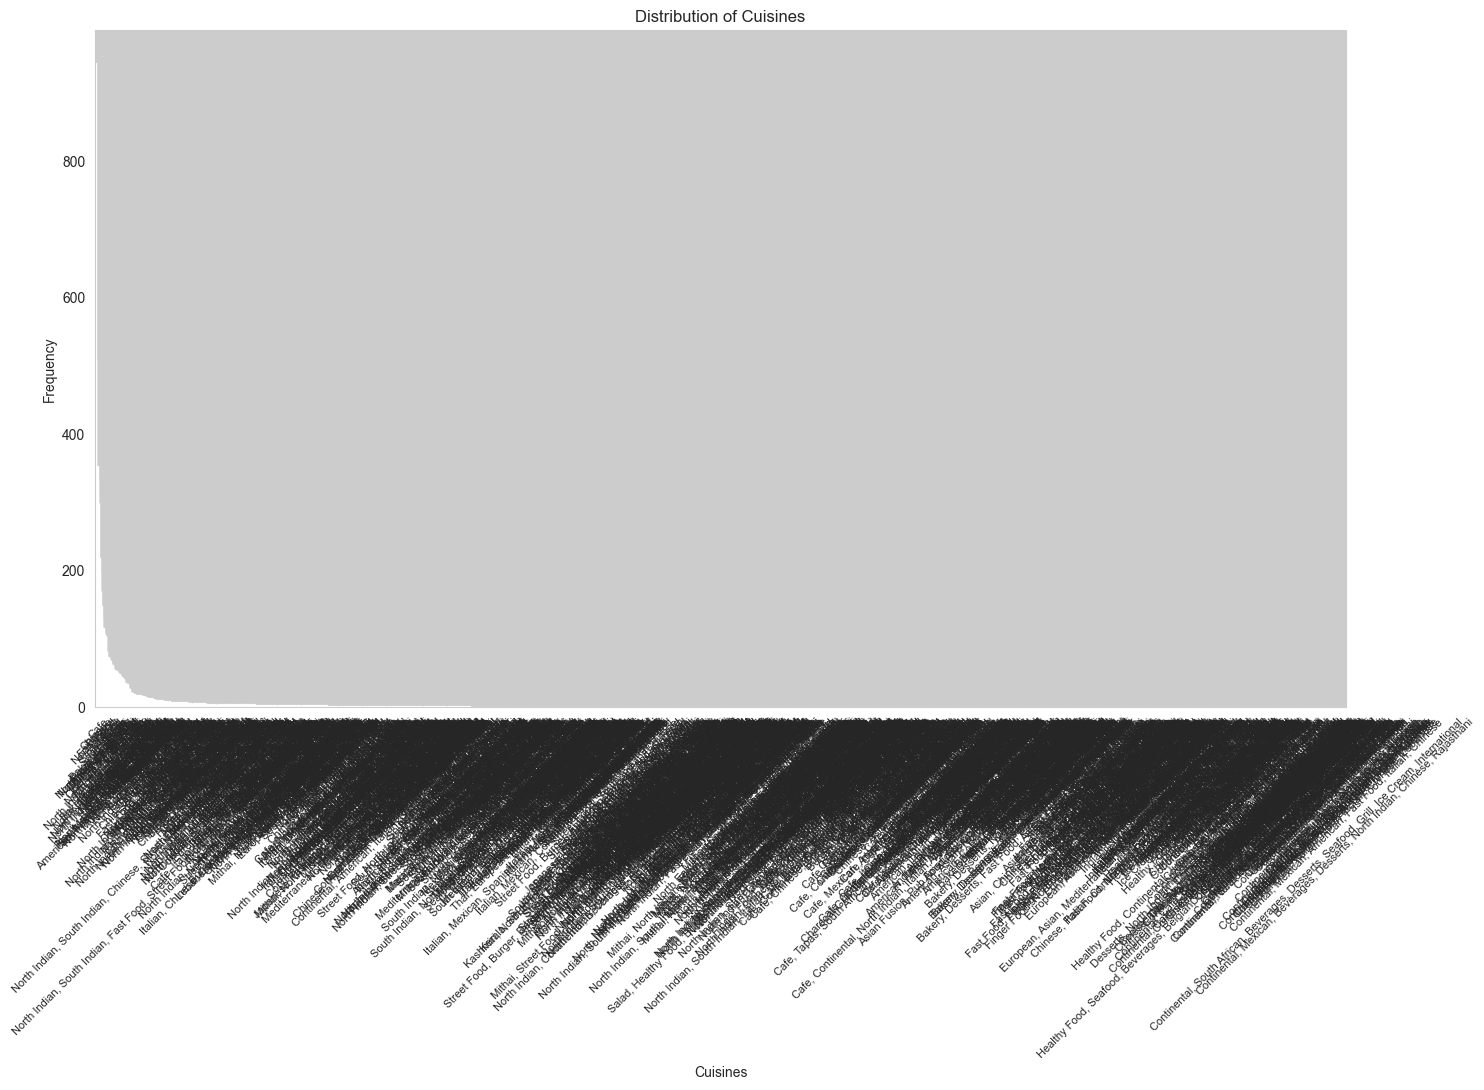

In [22]:
def plot_cuisine_column(df, column_name="Cuisines", bins=10):
    """Plot the distribution of a categorical column using a bar plot."""
    # Set plot style
    sns.set_style('whitegrid')
    
    # Get value counts for the specified column
    value_counts = df[column_name].value_counts()
    
    # Group the counts into similar numbers
    value_counts_grouped = pd.cut(value_counts, bins=bins).value_counts().sort_index()
    
    # Plot the distribution using a bar plot
    plt.figure(figsize=(15, 11))
    value_counts_grouped.plot(kind='bar', color='skyblue')
    
    # Set plot title and labels
    plt.title(f'Distribution of {column_name}', fontsize=12)
    plt.xlabel(f'{column_name} (Grouped)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.xticks(fontsize=8, rotation=45)
    plt.yticks(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_cat_column(datasets, "Cuisines")

The distribution of the `Cuisines` column appears that there is a diverse range of cuisines represented in the dataset. Some of the most common cuisines include `North Indian, Chinese, Fast Food, Mughlai, Cafe, Bakery, Street Food, and Pizza`. Additionally, there are several combinations of cuisines, such as `"North Indian, Chinese"` and `"Bakery, Desserts"` indicating that some restaurants offer a variety of culinary options. This diversity suggests that the dataset encompasses a wide range of dining preferences and culinary traditions.

## Identify the top cuisines and cities with the highest number of restaurants.
- Task 2.c

We first look at the `Cuisines` column to count all the individual cuisines in that column.
We then will identify the top 10 cuisines in our dataset.

In [23]:
from collections import Counter
# Splitting the Cuisine column into individual cuisine entries
cuisines_list = datasets['Cuisines'].str.split(', ')

# Flattening the list of lists into a single list of all cuisines
all_cuisines = [cuisine for sublist in cuisines_list for cuisine in sublist]

# Counting occurrences of each cuisine
cuisine_counts = Counter(all_cuisines)

# Displaying the top cuisines
top_cuisines = cuisine_counts.most_common(10)
print("Top cuisines:")
for cuisine, count in top_cuisines:
    print(f"{cuisine}: {count:,}")

Top cuisines:
North Indian: 3,969
Chinese: 2,735
Fast Food: 1,986
Mughlai: 995
Italian: 764
Bakery: 745
Continental: 736
Cafe: 703
Desserts: 653
South Indian: 636


This analysis reveals that `North Indian` cuisine dominates the restaurant scene, followed closely by `Chinese` and `Fast Food` options. `Mughlai` and `Italian` cuisines also hold significant presence among the top choices.

Now that we know our top cuisines we can then go ahead and tackle the next task `Cities` with the highest number of restaurants.

In [24]:
# Initialize an empty dictionary to store the counts of restaurants in each city
city_counts = {}

# Iterate through the "City" column in the DataFrame
for city in datasets['City']:
    # Increment the count for the current city in the dictionary
    city_counts[city] = city_counts.get(city, 0) + 1

# Sort the dictionary by the count of restaurants in descending order
sorted_cities = sorted(city_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top cities with the highest number of restaurants
top_cities = sorted_cities[:10]

# Print the top cities with their corresponding restaurant counts
for city, count in top_cities:
    print(f"{city}: {count:,}")

New Delhi: 5,473
Gurgaon: 1,118
Noida: 1,080
Faridabad: 251
Ghaziabad: 25
Ahmedabad: 21
Amritsar: 21
Bhubaneshwar: 21
Guwahati: 21
Lucknow: 21


The top cities with the highest number of restaurants are `New Delhi, Gurgaon, and Noida`, with `New Delhi` leading significantly with 5473 restaurants. Following closely are `Gurgaon and Noida`, with 1118 and 1080 restaurants respectively, while the remaining cities have notably fewer restaurants.

## Task 3

## Task:  Geospatial Analysis

- Task 3.a
### Visualize the locations of restaurants on a map using  latitude and  longitude information.

To do this task we use folio to achieve the desired map

In [26]:
import folium
from folium.plugins import MarkerCluster

def visualize_restaurant_locations(df):
    # Create a map centered around an average latitude and longitude
    map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
    map_restaurants = folium.Map(location=map_center, zoom_start=10)

    # Add markers for each restaurant location
    marker_cluster = MarkerCluster().add_to(map_restaurants)
    for idx, row in df.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=row['RestaurantName']
        ).add_to(marker_cluster)

    # Save the map as an HTML file
    map_restaurants.save('../reports/figures/restaurant_locations.html')

# Call the function with your dataframe
visualize_restaurant_locations(datasets)

The visualization was saved using html format so it will be added to the final notebook. And you can also run the code below to see it in the notebook by uncommenting the code.

In [27]:
# from IPython.display import HTML

# with open('../reports/figures/restaurant_locations.html', 'r') as file:
#     html_content = file.read()

# display(HTML(html_content))

### Analyze the distribution of restaurants across different cities or countries. Determine if there is any correlation between the restaurant's location and its rating.

- Task 3.b

We will create a function that takes a dataframe and plots the distribution of restaurants accross the various cities in our datasets.

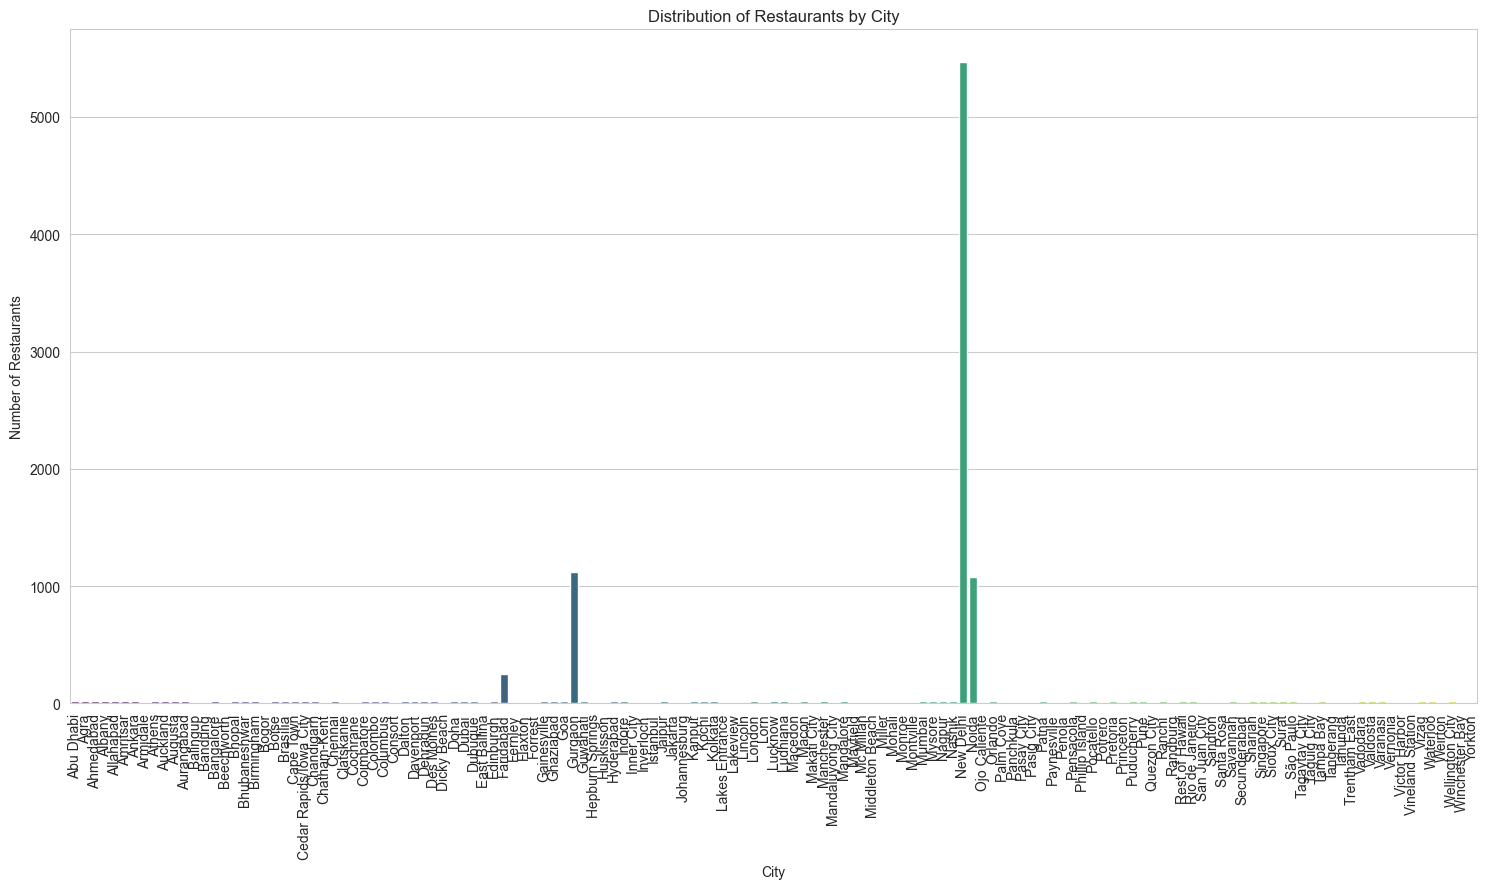

In [28]:
def plot_city_distribution(df):
    city_counts = df['City'].value_counts()
    plt.figure(figsize=(15, 9))
    sns.barplot(x=city_counts.index, hue=city_counts.index, y=city_counts.values, palette='viridis', legend=False)
    plt.title('Distribution of Restaurants by City')
    plt.xlabel('City')
    plt.ylabel('Number of Restaurants')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_city_distribution(datasets)

The distribution of restaurants by city reveals that `New Delhi` has the highest number of restaurants, followed by `Gurgaon and Noida`, with 5473, 1118, and 1080 restaurants respectively. The distribution is heavily skewed towards major metropolitan areas, with `Faridabad and Ghaziabad` having fewer restaurants in comparison. Additionally, there are many cities with only a single restaurant, indicating a wide range of locations covered in the dataset.

We also determine if there is any correlation between the location of a restaurant and its rating using pearson rank correlation.

In [29]:
def calculate_correlation(df):
    correlation = df[['Latitude', 'Longitude', 'Aggregaterating']].corr()
    print("Correlation Matrix:")
    print(correlation)
    correlation_coefficient = correlation.loc['Aggregaterating', ['Latitude', 'Longitude']]
    print("\nCorrelation Coefficients:")
    print(correlation_coefficient)

calculate_correlation(datasets)

Correlation Matrix:
                 Latitude  Longitude  Aggregaterating
Latitude         1.000000   0.043207         0.000516
Longitude        0.043207   1.000000        -0.116818
Aggregaterating  0.000516  -0.116818         1.000000

Correlation Coefficients:
Latitude     0.000516
Longitude   -0.116818
Name: Aggregaterating, dtype: float64


The correlation matrix and coefficients suggest that there is a weak negative correlation between `longitude` and the `aggregate rating` of restaurants, indicating that as `longitude` increases (moving east), the `rating` tends to slightly decrease. However, the correlation is very small, suggesting that `latitude` and `longitude` have minimal impact on the overall rating of restaurants. This implies that factors other than geographical location might have a more significant influence on restaurant ratings.

## Level 2 Tasks

### Task: Table Booking and Online Delivery

### Task 1.a

- Determine the percentage of restaurants that offer table booking and online delivery.

We will create a function to achieve this task. The function would calculate the total table bookings and total online delivery percentages

In [30]:
def calculate_service_percentage(df):
    """Calculate the percentage of restaurants offering table booking and online delivery."""
    # Count the number of restaurants offering table booking and online delivery
    table_booking_count = (df["HasTablebooking"] == "Yes").sum()
    online_delivery_count = (df['HasOnlinedelivery'] == "Yes").sum()
    
    # Calculate the total number of restaurants
    total_restaurants = len(df)
    
    # Calculate the percentage of restaurants offering table booking and online delivery
    table_booking_percentage = (table_booking_count / total_restaurants) * 100
    online_delivery_percentage = (online_delivery_count / total_restaurants) * 100
    
    return table_booking_percentage, online_delivery_percentage

table_booking_percentage, online_delivery_percentage = calculate_service_percentage(datasets)
print(f"The total percentage of restaurants that offer table booking is: {table_booking_percentage:.0f}%")
print(f"The total percentage of restaurants that offer online delivery service is: {online_delivery_percentage:.0f}%")

The total percentage of restaurants that offer table booking is: 12%
The total percentage of restaurants that offer online delivery service is: 26%


The analysis reveals that a relatively small proportion, accounting for `12% of the total restaurants`, offer `table booking services`. Conversely, a larger share, constituting `26% of the establishments`, provide `online delivery services`. This suggests a `greater emphasis on online delivery` convenience over table booking among the restaurants surveyed.

### Task 1.b
- Compare the average ratings of restaurants with table booking and those without.

We can develop a function to calculate the average ratings of restauranta with table booking and without table booking. Below is the function:

In [31]:
def compare_ratings(df):
    """Compare the average ratings of restaurants with table booking and those without."""
    # Filter dataframe for restaurants with table booking
    with_table_booking = df[df['HasTablebooking'] == 'Yes']

    # Filter dataframe for restaurants without table booking
    without_table_booking = df[df['HasTablebooking'] == 'No']

    # Calculate mean rating for restaurants with table booking
    mean_rating_with_booking = with_table_booking['Aggregaterating'].mean()

    # Calculate mean rating for restaurants without table booking
    mean_rating_without_booking = without_table_booking['Aggregaterating'].mean()

    # Print the results
    print(f"The average rating for restaurants with table booking is: {mean_rating_with_booking:.2f}")
    print(f"The average rating for restaurants without table booking is: {mean_rating_without_booking:.2f}")


compare_ratings(datasets)

The average rating for restaurants with table booking is: 3.44
The average rating for restaurants without table booking is: 2.56


The comparison reveals a notable difference in average ratings between restaurants `offering table booking` and `those without`. `Restaurants` with `table booking` tend to have a significantly `higher average rating`, suggesting a possible correlation between the availability of this service and customer satisfaction. This underscores the importance of providing `convenient reservation options to patrons`, potentially enhancing overall dining experiences and positively impacting ratings.

### Task 1.c
- Analyze the availability of online delivery among restaurants with different price ranges.

We create function to perform this task. The function would group the dataset by price range and has online delivery service
and then calculates the percentages of restaurants with online delivery services.

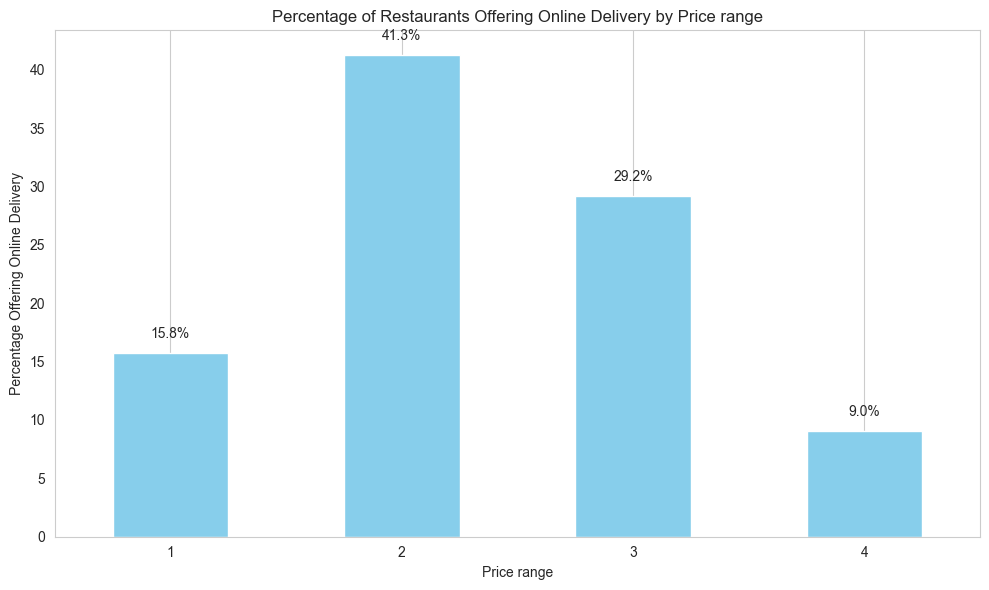

In [32]:
price_range_delivery_percentage = datasets.groupby('Pricerange')['HasOnlinedelivery'].value_counts(normalize=True)[:, 'Yes'] * 100

plt.figure(figsize=(10, 6))
ax = price_range_delivery_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Restaurants Offering Online Delivery by Price range')
plt.xlabel('Price range')
plt.ylabel('Percentage Offering Online Delivery')
plt.xticks(rotation=0)
plt.grid(axis='y')

for i, percentage in enumerate(price_range_delivery_percentage):
    ax.text(i, percentage + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The distribution of restaurants across different price ranges indicates that the majority of restaurants fall into the mid-price range category (2), comprising around 41.3% of the total. Lower-priced restaurants (1) constitute approximately 15.8% of the distribution, while higher-priced establishments (3 and 4) collectively represent around 38.2%. This suggests a balanced distribution with a notable presence of mid-range options in relation to online delivery services.

## Task: Price Range Analysis

### Task 2.a
- Determine the most common price range among all the restaurants.

We can determine the most common price range by calculating the proportion of each price range category and then identify the one with the highest proportion.

In [33]:
# Calculate the proportion of each price range category
price_range_proportion = datasets['Pricerange'].value_counts(normalize=True) * 100

# Identify the most common price range
most_common_price_range = price_range_proportion.idxmax()

print("The most common price range among all the restaurants is:", most_common_price_range)

The most common price range among all the restaurants is: 1


This could imply that there are more affordable dining options available compared to higher-priced establishments.

### Task 2.b
- Calculate the average rating for each price range.


To calculate the average rating for each price range, we can group the dataset by price range and then compute the mean of the `Aggregate rating` column within each group. Below is the implementation;

In [35]:
price_range_avg_rating = datasets.groupby('Pricerange')['Aggregaterating'].mean().round(2)
print(price_range_avg_rating)

Pricerange
1    2.00
2    2.94
3    3.68
4    3.82
Name: Aggregaterating, dtype: float64


### Task 2.c
- Identify the color that represents the highest average rating among different price ranges.

First we will try and get the color for the highest rating among all the price ranges in the datasets. We will develop a function to achieve that task. Then we will go ahead and get the highest color in each particular price range.

In [36]:
def get_highest_rating_color(df):
    avg_rating_by_price = df.groupby("Pricerange")["Aggregaterating"].mean().round(2)
    highest_rating_price = avg_rating_by_price.idxmax()
    highest_rating_color = df[df["Pricerange"] == highest_rating_price]["Ratingcolor"].iloc[0]
    return highest_rating_color

print(f"The color associated with the highest average rating among different price ranges is: {get_highest_rating_color(datasets)}")

The color associated with the highest average rating among different price ranges is: Green


Now we can proceed to get the highest color in each price range, we can achieve this by creating a function that takes a dataframe calculates the highest rating in each price range and then locates that with the appropriate color.

In [37]:
def get_highest_rating_color_per_range(df):
    price_ranges = df["Pricerange"].unique()
    highest_rating_colors = {}
    for price_range in price_ranges:
        max_rating = df[df["Pricerange"] == price_range]["Aggregaterating"].max()
        highest_rating_color = df[(df["Pricerange"] == price_range) & (df["Aggregaterating"] == max_rating)] ["Ratingcolor"].iloc[0]
        highest_rating_colors[price_range] = highest_rating_color  
            
    return highest_rating_colors

get_highest_rating_color_per_range(datasets)

{3: 'Dark Green', 4: 'Dark Green', 2: 'Dark Green', 1: 'Dark Green'}

### Task 3
### Feature Engineering

Task 1.a
- Extract additional features fromthe existing columns, such as the lenght of the restaurnat name or address.

In [40]:
# Creating new columns called namelenght anf addresslenght
datasets["RestaurantNameLength"] = datasets["RestaurantName"].str.len()
datasets["AddressLength"] = datasets["Address"].str.len()

### Task 1.b
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [42]:
# One Hot Encoding the HasTablebooking and HasOlinedelivery columns
datasets["HasTablebooking"] = datasets["HasTablebooking"].map({"Yes": 1, "No": 0})
datasets["HasOnlinedelivery"] = datasets["HasOnlinedelivery"].map({"Yes": 1, "No": 0})

In [47]:
# One Hot Encoding Isdeliveringnow and Switchtoordermenu cloumns as well
datasets["Isdeliveringnow"] = datasets["Isdeliveringnow"].map({"Yes": 1, "No": 0})
datasets["Switchtoordermenu"] = datasets["Switchtoordermenu"].map({"No": 1})

In [74]:
from sklearn.preprocessing import LabelEncoder

In [111]:
# Label encoding the rest of the categorical columns
columns_to_encode = ["RestaurantName", "City", "Address", "Locality", "LocalityVerbose", "Cuisines", "Ratingcolor", "Currency", "Ratingtext"]
 
def label_encode_columns(df, columns):
    df_encoded = df.copy()
    label_encoder = LabelEncoder()
    for column in columns:
        # Apply LabelEncoder to each column
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
    return df_encoded

In [112]:
encoded_dataset = label_encode_columns(datasets, columns_to_encode)

## Level 3

### Predictive Modellig

### Task 1.a
- Build a regression model to predict the aggregate rating of a restaurant based on available features.


Import the neccessary model building libraries for our baseline model

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### Partitioning our dataset into training and testing groups 

In [114]:
# Create our X features and y target variable
X = encoded_dataset.drop("Aggregaterating", axis=1)
y = encoded_dataset["Aggregaterating"]

In [115]:
# Create a training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=59)

In [116]:
print(X_train.shape, X_test.shape)

(6685, 22) (2866, 22)


In [117]:
# Create a pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("l_regressor", LinearRegression())
])

## Training the baseline model

In [119]:
# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('l_regressor', LinearRegression())])

## Evaluating the performance of the baseline model

Importing the neccessary libraries for the evaluation.

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

In [122]:
# Make predictions on the test set
yhat = pipeline.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, yhat)
r_squared = r2_score(y_test, yhat)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"R-squared: {r_squared:.2f}")

Mean Squared Error (MSE): 1.16276
R-squared: 0.48


The MSE value of 1.16276 indicates that, on average, the model's predictions deviate from the actual values by approximately 1.16276 units.
The R-squared value of 0.48 suggests that the model explains around 48% of the variance in the target variable, indicating moderate predictive performance.
We can do better from here to improve our subsequent models

In [123]:
# we save our baseline model to pickle
with open("../models/baseline.pkl", "wb") as bl:
    pickle.dump(pipeline, bl)

We now would try and improve our model by trying out different models

### Impoting the neccessary packages for improving our model

In [124]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [125]:
# Define the pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", None)  # This will be replaced by the actual regressor during GridSearchCV
])

In [126]:
# Define the parameter grid for GridSearchCV
param_grid = [
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100, 150],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5, 10]
    },
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__n_estimators': [50, 100, 150],
        'regressor__learning_rate': [0.01, 0.1, 0.5],
        'regressor__max_depth': [3, 5, 10]
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1.0, 10.0]
    }
]


In [127]:
# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

In [128]:
# Train the model using GridSearch
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', None)]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [None, 10, 20],
                          'regressor__min_samples_split': [2, 5, 10],
                          'regressor__n_estimators': [50, 100, 150]},
                         {'regressor': [GradientBoostingRegressor()],
                          'regressor__learning_rate': [0.01, 0.1, 0.5],
                          'regressor__max_depth': [3, 5, 10],
                          'regressor__n_estimators': [50, 100, 150]},
                         {'regressor': [Ridge()],
                          'regressor__alpha': [0.1, 1.0, 10.0]}],
             scoring='neg_mean_squared_error')

In [129]:
# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Best model
best_model = grid_search.best_estimator_

Best parameters: {'regressor': GradientBoostingRegressor(), 'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 100}


In [130]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

Mean Squared Error (MSE): 0.02697539983713252
R-squared: 0.9880148503654261


The MSE value of 0.02697539983713252 is extremely low, indicating high predictive accuracy.
The R-squared value of 0.9880148503654261 indicates that the model explains almost all of the variance in the target variable, demonstrating exceptional model fit and predictive performance.

In [131]:
# saving our best model to pickle
with open("../models/gradientboost.pkl", "wb") as bm:
    pickle.dump(best_model, bm)

## Task 2
## Customer Preference Analysis

### Task 2.a
- Analyze the relationship between the type of cuisine and the restaurant's rating.

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\336539210.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuisine_ratings = datasets.groupby('Cuisines')['Aggregaterating'].mean().sort_values(ascending=False)
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\336539210.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')
C:\Users\Emmanuel\Documents\ALX DS PROGRAM\cognifyztech-intern\cognifyztech\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


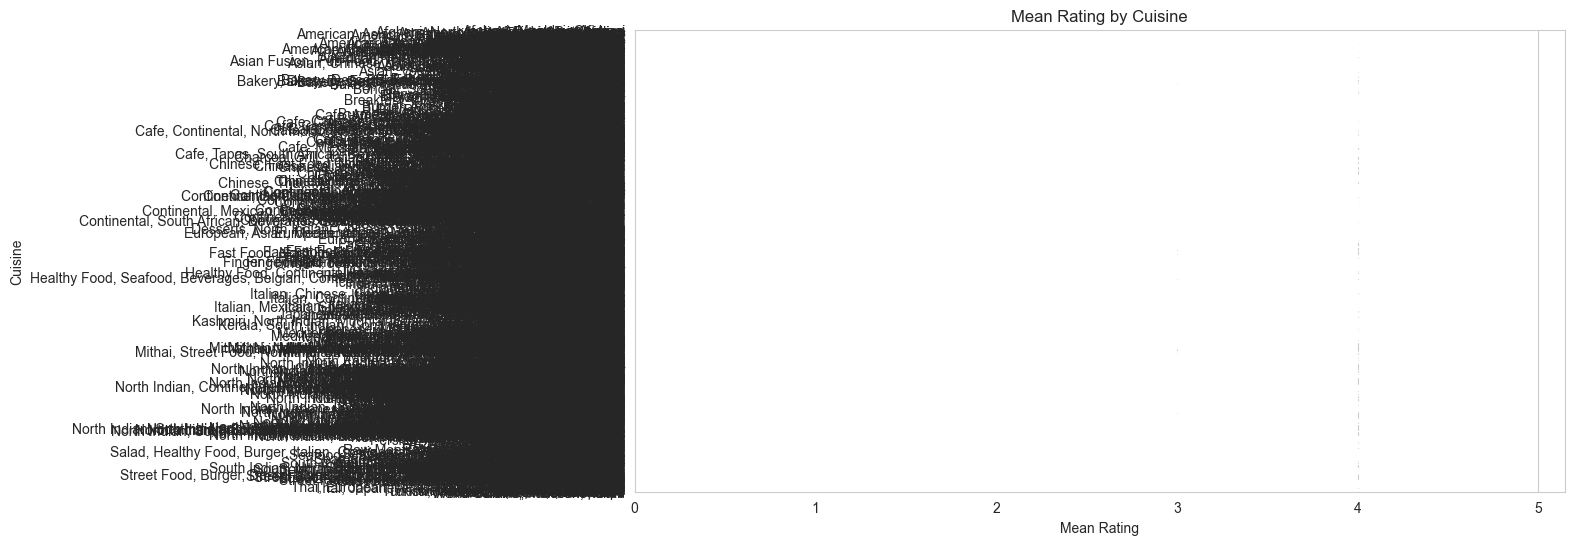

In [146]:
# Group data by cuisine type and calculate mean rating
cuisine_ratings = datasets.groupby('Cuisines')['Aggregaterating'].mean().sort_values(ascending=False)

# Visualize mean ratings for each cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='viridis')
plt.xlabel('Mean Rating')
plt.ylabel('Cuisine')
plt.title('Mean Rating by Cuisine')
plt.show()

### Task 2.b
- Identify the most popular cuisines among customers based on the number of votes.

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\3454415370.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuisine_votes = datasets.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\3454415370.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index, palette='viridis')
C:\Users\Emmanuel\Documents\ALX DS PROGRAM\cognifyztech-intern\cognifyztech\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


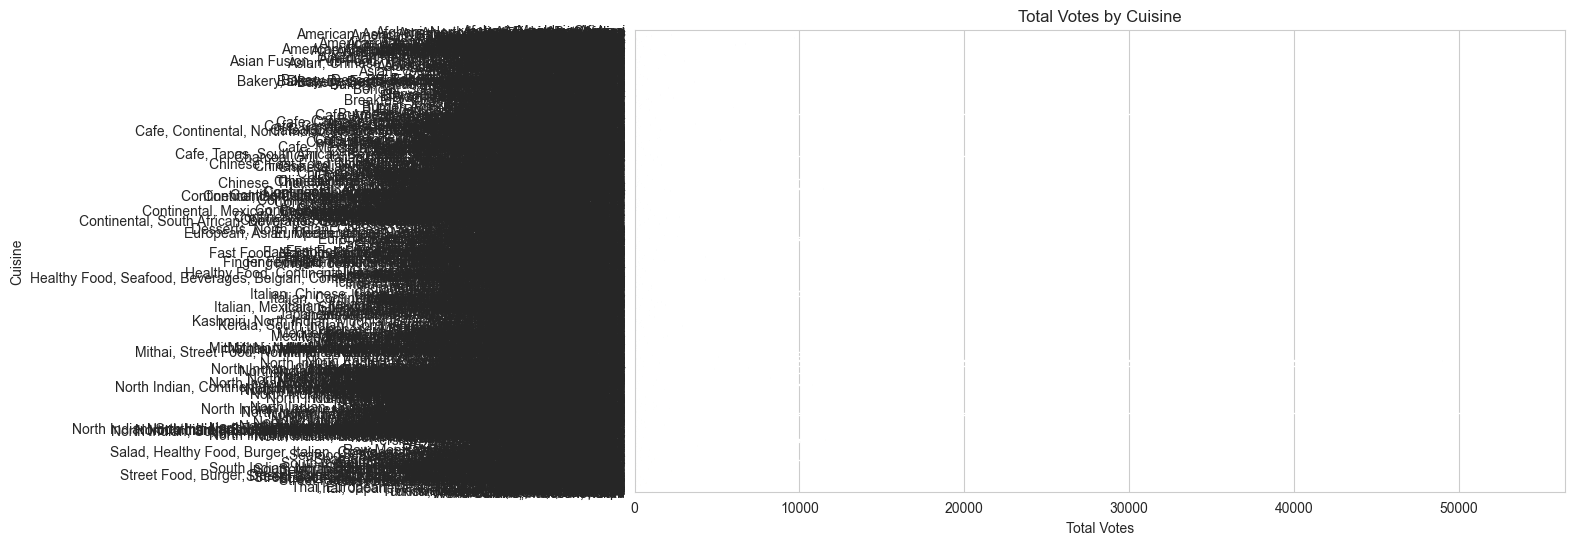

Top Cuisines Based on Total Votes:
Cuisines
North Indian, Mughlai    53747
North Indian             48967
North Indian, Chinese    42012
Cafe                     30657
Chinese                  21925
Name: Votes, dtype: int64


In [149]:
# Group data by cuisine type and calculate total votes
cuisine_votes = datasets.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Visualize total votes for each cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_votes.values, y=cuisine_votes.index, palette='viridis')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.title('Total Votes by Cuisine')
plt.show()

# Print the top cuisines based on total votes
print("Top Cuisines Based on Total Votes:")
print(cuisine_votes.head())

### Task 2.c
- Determine if there are any specific cuisines that tend to receive higher ratings.

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\1092290069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuisine_ratings = datasets.groupby('Cuisines')['Aggregaterating'].mean().sort_values(ascending=False)
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\1092290069.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='coolwarm')
C:\Users\Emmanuel\Documents\ALX DS PROGRAM\cognifyztech-intern\cognifyztech\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


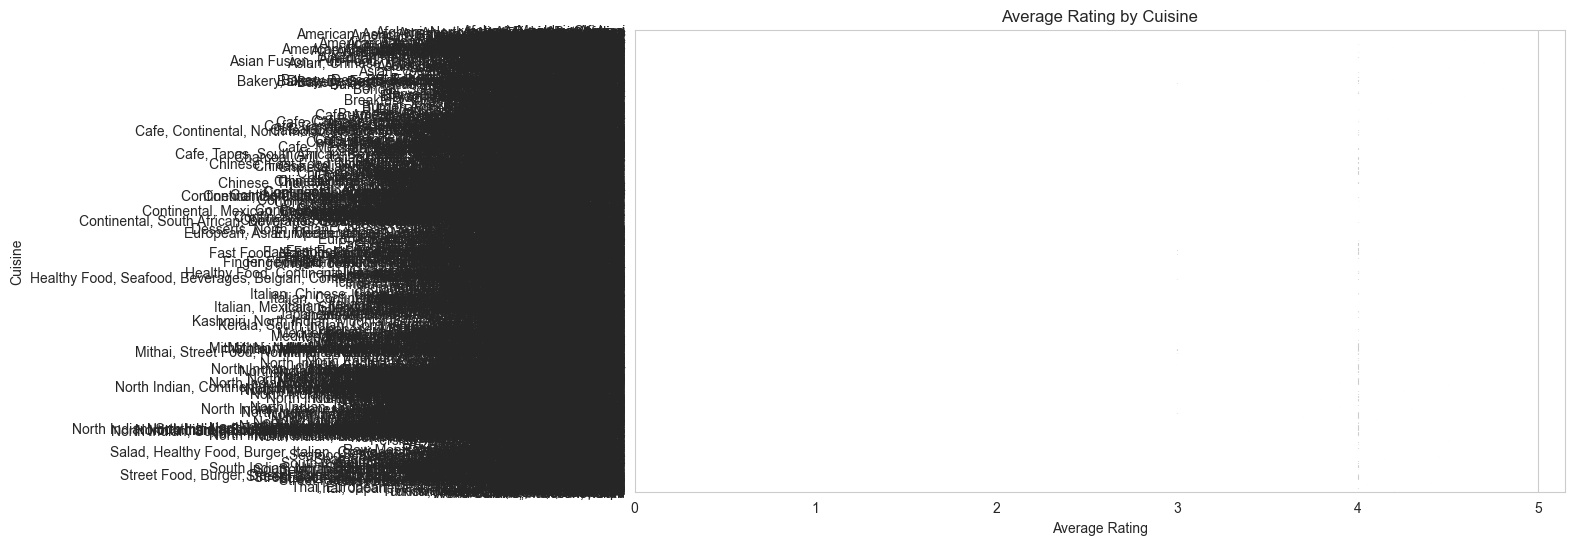

Top Cuisines Based on Average Rating:
Cuisines
Italian, Deli              4.9
Hawaiian, Seafood          4.9
American, Sandwich, Tea    4.9
Continental, Indian        4.9
European, Asian, Indian    4.9
Name: Aggregaterating, dtype: float64


In [152]:
# Group data by cuisine type and calculate average rating
cuisine_ratings = datasets.groupby('Cuisines')['Aggregaterating'].mean().sort_values(ascending=False)

# Visualize average ratings for each cuisine
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Average Rating by Cuisine')
plt.show()

# Optional: Print the top cuisines based on average rating
print("Top Cuisines Based on Average Rating:")
print(cuisine_ratings.head())

## Task 3 
## Data Visualization

### Task 3.a
- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).



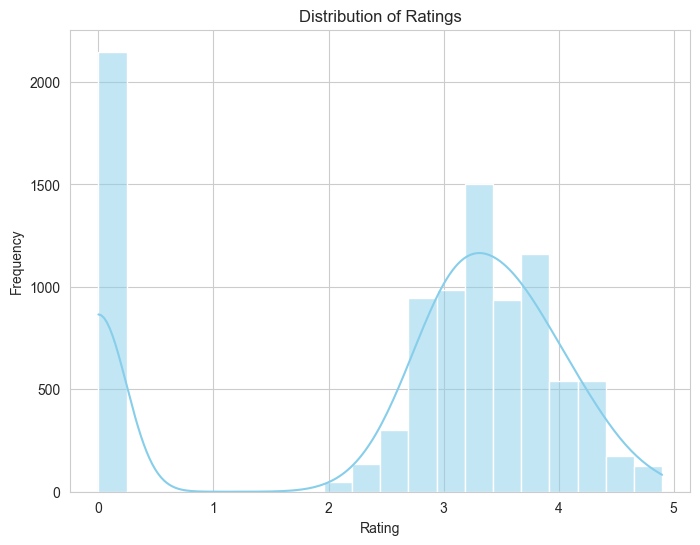

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\1512004648.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Aggregaterating', y='Cuisines', data=datasets, estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\1512004648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregaterating', y='Cuisines', data=datasets, estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\Emmanuel\Documents\ALX DS PROGRAM\cognifyztech-intern\cognifyztech\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


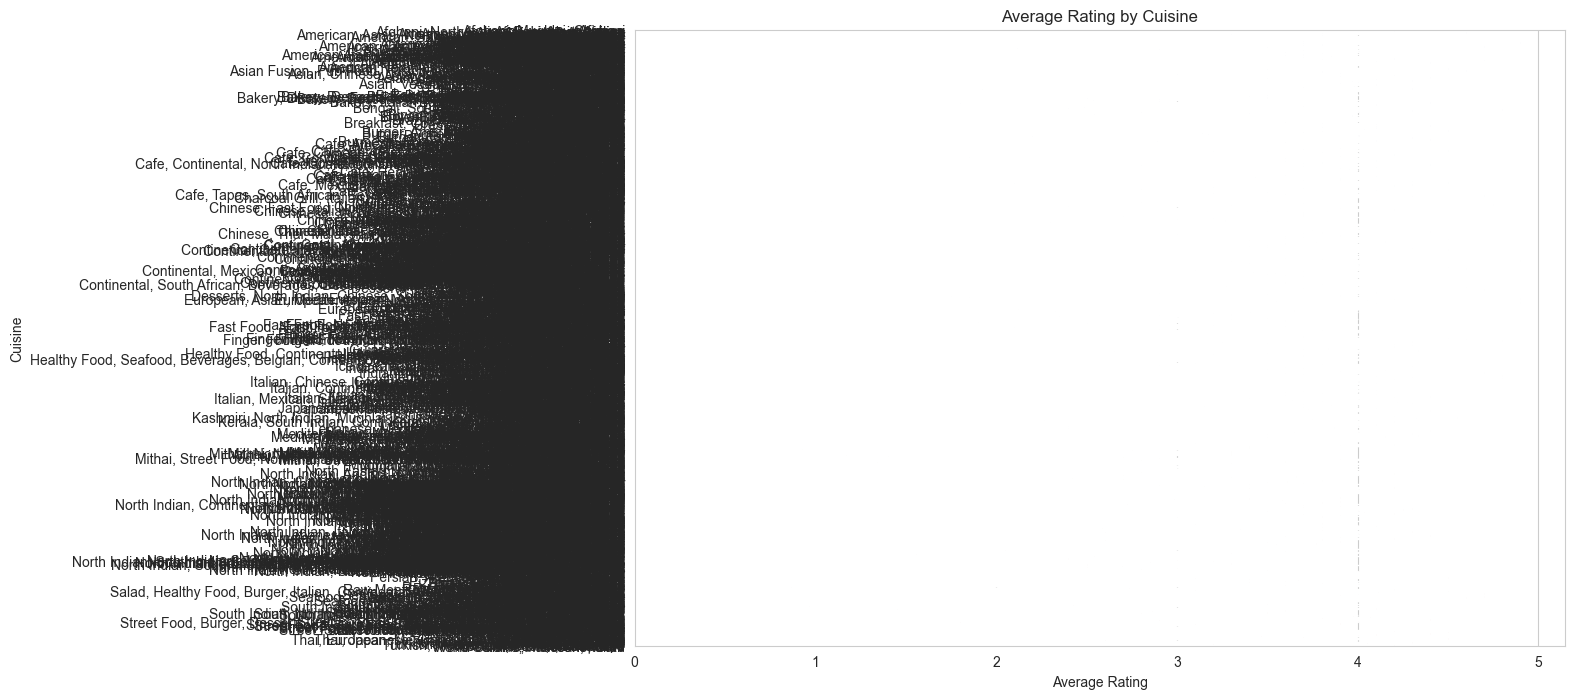

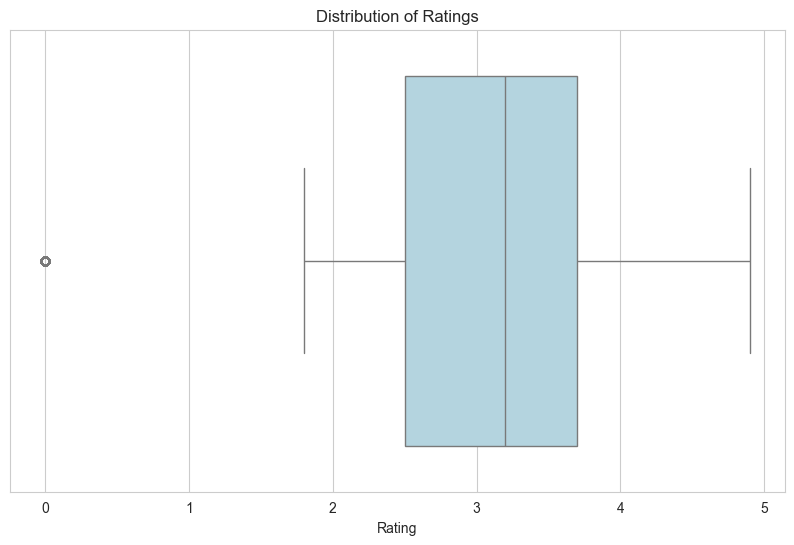

In [153]:
# Histogram of ratings
plt.figure(figsize=(8, 6))
sns.histplot(datasets['Aggregaterating'], bins=20, kde=True, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Bar plot of average rating by cuisine
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregaterating', y='Cuisines', data=datasets, estimator=np.mean, ci=None, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Average Rating by Cuisine')
plt.show()

# Box plot of ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aggregaterating', data=datasets, color='lightblue')
plt.xlabel('Rating')
plt.title('Distribution of Ratings')
plt.show()

### Task 3.b
- Compare the average ratings of different cuisines or cities using appropriate visualizations.

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\2887756921.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Aggregaterating', y='Cuisines', data=datasets, estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\2887756921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregaterating', y='Cuisines', data=datasets, estimator=np.mean, ci=None, palette='coolwarm')
C:\Users\Emmanuel\Documents\ALX DS PROGRAM\cognifyztech-intern\cognifyztech\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


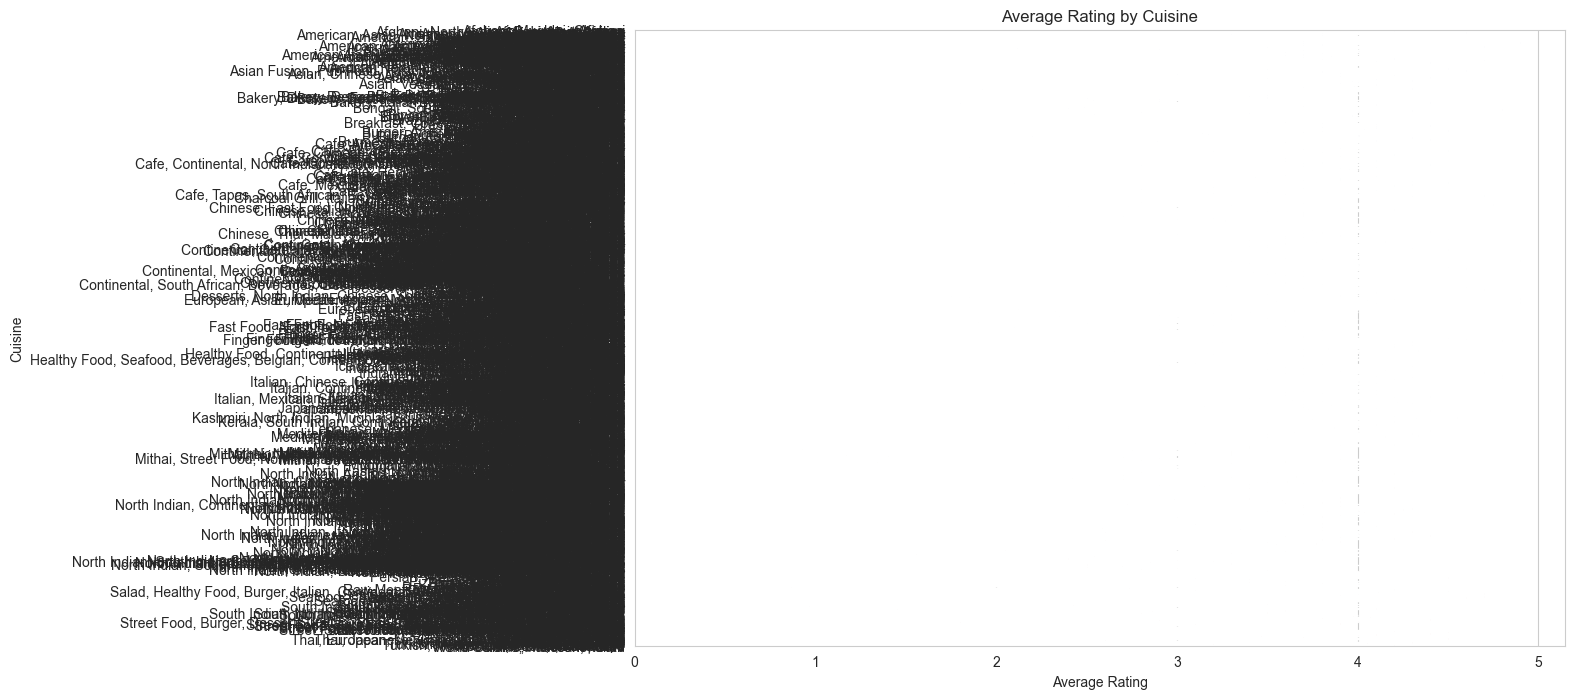

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\2887756921.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Aggregaterating', y='City', data=datasets, estimator=np.mean, ci=None, palette='muted')
C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\2887756921.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregaterating', y='City', data=datasets, estimator=np.mean, ci=None, palette='muted')


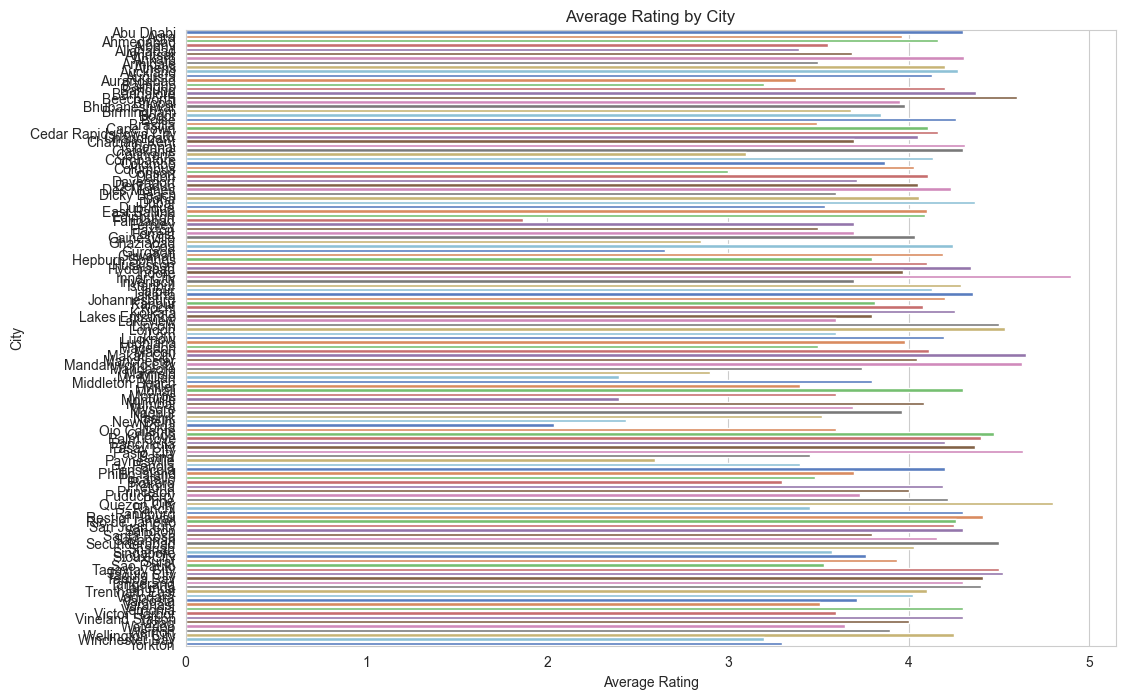

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\2887756921.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Aggregaterating', y='Cuisines', data=datasets, palette='pastel')
C:\Users\Emmanuel\Documents\ALX DS PROGRAM\cognifyztech-intern\cognifyztech\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


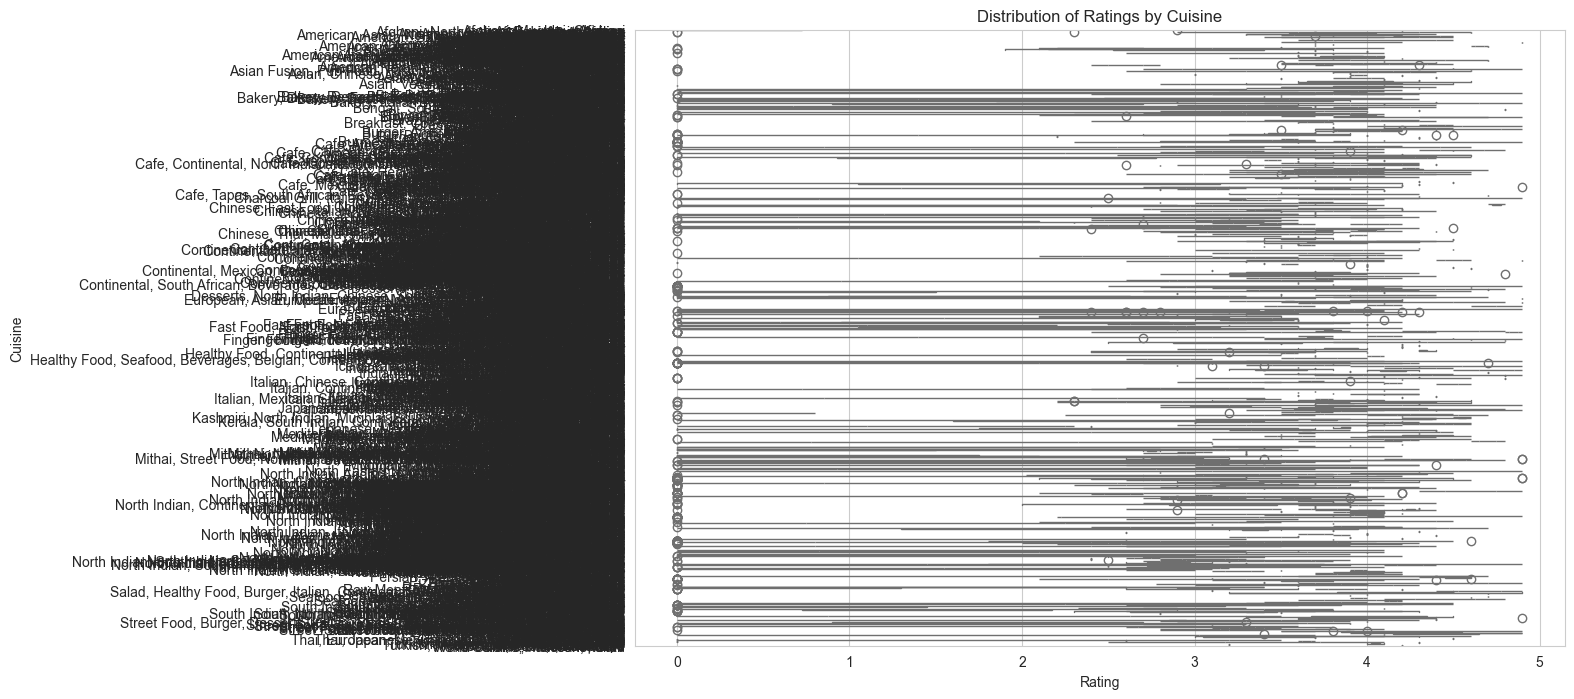

C:\Users\Emmanuel\AppData\Local\Temp\ipykernel_16048\2887756921.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Aggregaterating', y='City', data=datasets, palette='bright')


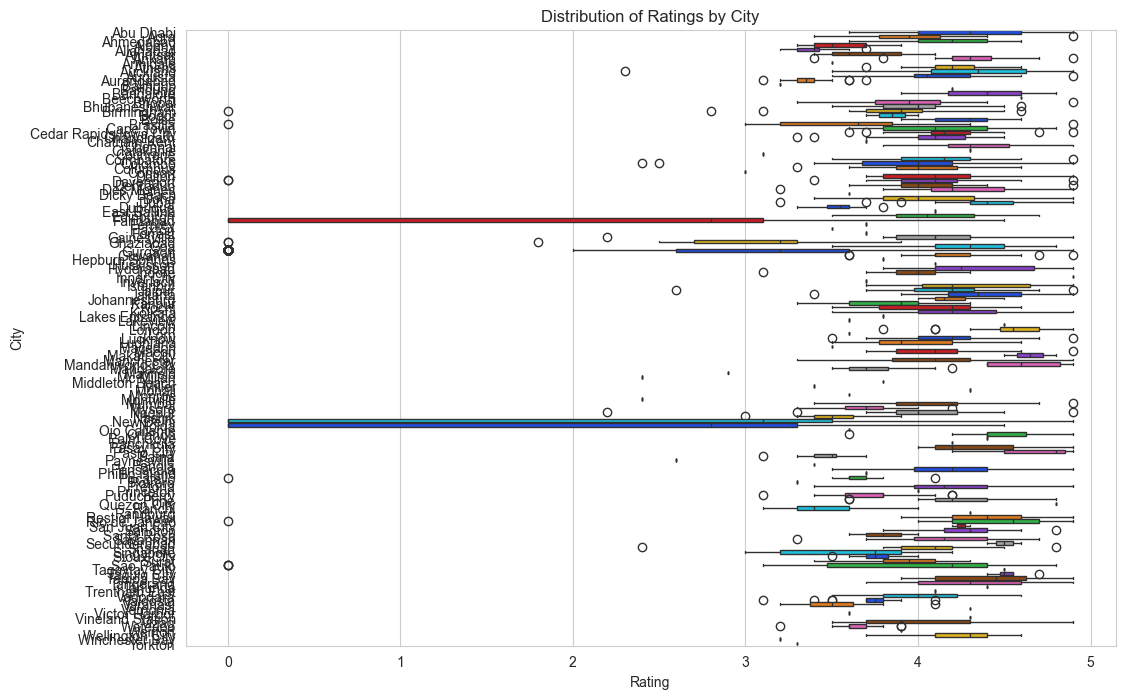

In [154]:
# Bar plot of average rating by cuisine
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregaterating', y='Cuisines', data=datasets, estimator=np.mean, ci=None, palette='coolwarm')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.title('Average Rating by Cuisine')
plt.show()

# Bar plot of average rating by city
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregaterating', y='City', data=datasets, estimator=np.mean, ci=None, palette='muted')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.title('Average Rating by City')
plt.show()

# Box plot of ratings by cuisine
plt.figure(figsize=(12, 8))
sns.boxplot(x='Aggregaterating', y='Cuisines', data=datasets, palette='pastel')
plt.xlabel('Rating')
plt.ylabel('Cuisine')
plt.title('Distribution of Ratings by Cuisine')
plt.show()

# Box plot of ratings by city
plt.figure(figsize=(12, 8))
sns.boxplot(x='Aggregaterating', y='City', data=datasets, palette='bright')
plt.xlabel('Rating')
plt.ylabel('City')
plt.title('Distribution of Ratings by City')
plt.show()

### Task 3.c
- Visualize the relationship between various features and the target variable to gain insights.

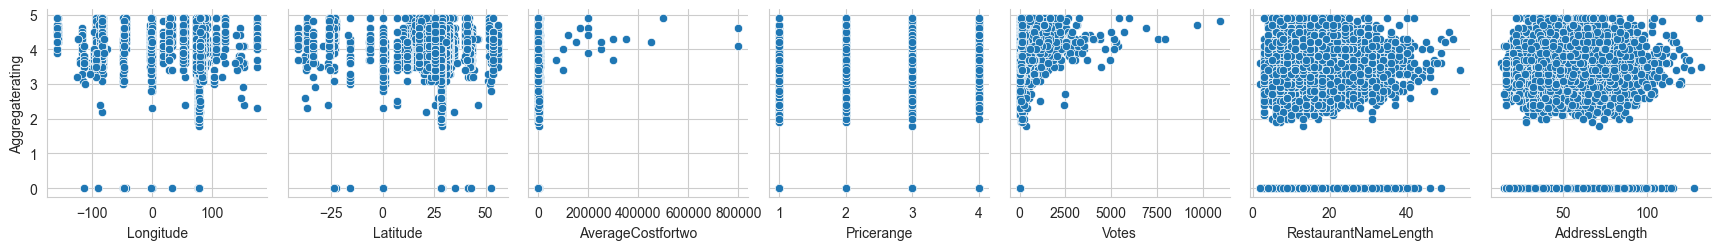

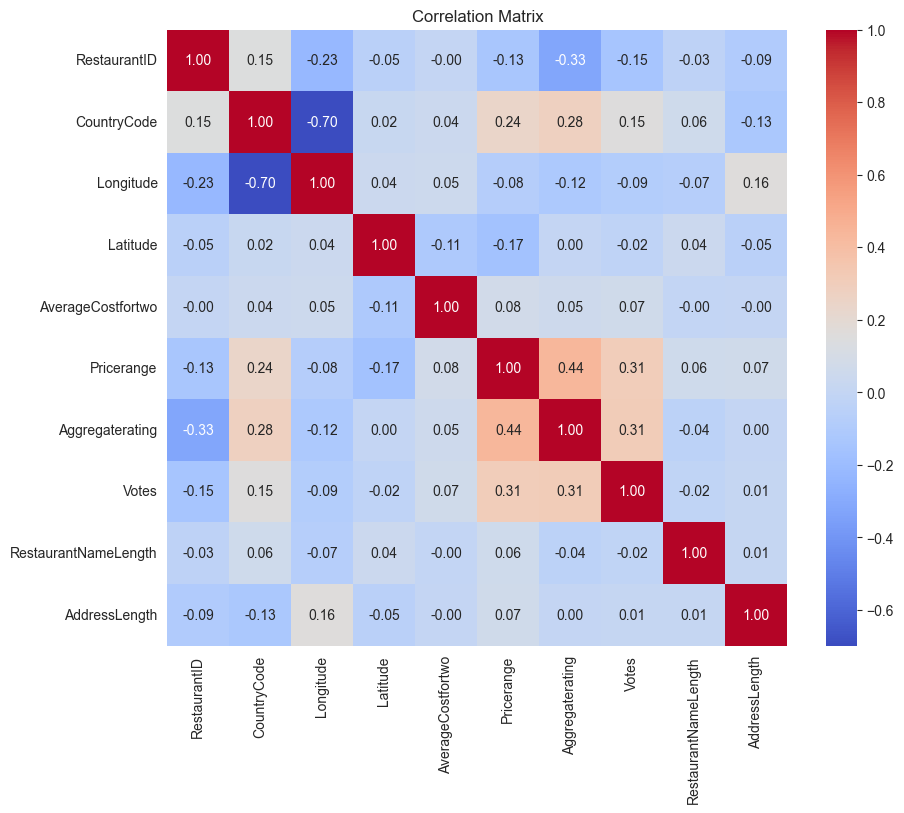

In [156]:
# Scatter plot of numerical features vs. aggregate rating
sns.pairplot(datasets, x_vars=['Longitude','Latitude','AverageCostfortwo','Pricerange','Votes','RestaurantNameLength','AddressLength'], y_vars=['Aggregaterating'], kind='scatter')
plt.show()

# Correlation matrix
corr_matrix = datasets.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Take aways
- I could do better in terms of my visualisation skills in python.
- I always should look out for encoding of a file or dataset(It really stressed me.)
- There is still more to learn as a beginner in the data science field.
- I enjoyed every bit of the journey.

# Well this was fun and I hope for more to come.
# Many thanks to Cognifyz Technologies for this oppurtunity to experience real world data and working on it from start to finish.